# Speed Dating Project 



In this notebook, I will use a dataset from speed dating experiment (which can be found <a href="https://www.kaggle.com/annavictoria/speed-dating-experiment">here</a> on the Kaggle website) and carry out some exploratory data analysis to draw conclusions about the outcome of the experiment.

### Part 1: Visual inspection of the data and descriptive statistics

In [13]:
# Loading the revelant libraries
import numpy as np 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.express as px
import plotly as py
import plotly.graph_objects as go

import warnings 
warnings.filterwarnings('ignore')

In [52]:
# Loading the data
data = pd.read_csv(r'C:\Users\Maria\OneDrive\AllWomen\Module 1\Speed Dating Data.csv')
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


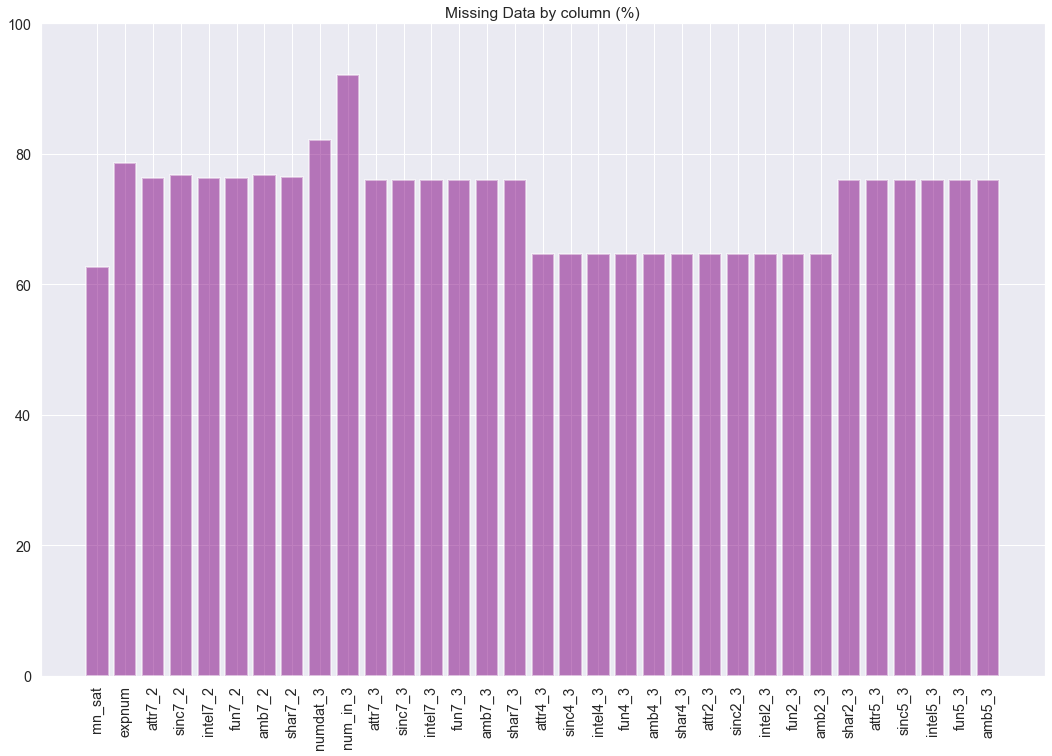

In [53]:
# Checking the percentage of missing data and identifying variables with a lot of missing data. 
col_names = []
percentages = []
for column in data:
    zeroPercentage = pd.isnull(data[column]).sum()/len(data[column])*100
    if zeroPercentage > 60:
        col_names.append(column)
        percentages.append(zeroPercentage)

plt.figure(figsize=(18, 12));
plt.bar(col_names, percentages, align='center', alpha=0.5, color='purple', linewidth=2, capsize=2)
plt.xticks(col_names, col_names, rotation='vertical')
plt.title('Missing Data by column (%)')
plt.ylim((0,100))
plt.show()

In [54]:
# Inspecting the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [55]:
# Drop these columns
data = data.drop(data[col_names], axis=1)
data.shape

(8378, 162)

In [56]:
# Drop the duplicate values for the same participants 
data.drop_duplicates(subset='iid', inplace=True)
data.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,421.000000,551.000000,...,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,276.787659,8.190563,0.502722,15.733212,1.700544,11.083485,15.230490,7.735027,8.467933,8.085299,...,16.720494,19.446578,16.089582,10.818023,12.679506,7.193916,8.091255,8.372624,7.623574,7.365019
std,159.494486,5.278600,0.500447,10.503833,0.458436,6.013947,4.989758,5.574506,5.589279,5.273431,...,7.772678,6.223928,5.300232,5.977424,6.560200,1.581272,1.570007,1.450826,1.733960,2.012327
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,1.000000
25%,139.500000,4.000000,0.000000,7.000000,1.000000,6.000000,10.000000,4.000000,4.000000,4.000000,...,10.000000,16.500000,13.705000,5.000000,10.000000,6.500000,7.000000,8.000000,7.000000,6.000000
50%,277.000000,7.000000,1.000000,14.000000,2.000000,11.000000,16.000000,6.000000,7.000000,7.000000,...,17.070000,20.000000,16.280000,10.000000,14.000000,7.000000,8.000000,8.000000,8.000000,8.000000
75%,414.500000,12.000000,1.000000,23.000000,2.000000,15.000000,20.000000,10.000000,13.000000,12.000000,...,20.000000,20.000000,20.000000,15.000000,16.670000,8.000000,9.000000,9.000000,9.000000,9.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,65.000000,45.000000,30.000000,30.000000,55.000000,12.000000,12.000000,12.000000,12.000000,12.000000


### Part 2: Data Cleaning 

In [57]:
# Selecting the features which seem more pertinent to the analysis 
features_to_analyse = ['gender', 'condtn','wave','round','order','match','int_corr','samerace','age_o','age','field',
                       'imprelig','goal','date','go_out','career','sports','tvsports','exercise','dining','museums',
                       'art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music',
                       'shopping','yoga','exphappy','attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1',
                       'attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1','attr3_1','sinc3_1','fun3_1',
                       'intel3_1','amb3_1','match_es', 'satis_2','date_3', 'race','imprace',]

In [58]:
# Creating a new dataset based on those features 
real_data = data[features_to_analyse]

In [59]:
# Identifying columns with data which needs to be filled 
columns_to_fix = ['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1', 'attr4_1','sinc4_1','intel4_1',
                  'fun4_1','amb4_1','shar4_1']

In [60]:
columns_to_drop_data = ['gender', 'condtn','wave','round','order','match','int_corr','samerace','age_o','age',
                        'field', 'imprelig','goal','date','go_out','career', 'race','imprace']
                        
columns_to_fill_with_mean = ['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1',
                       'attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1','attr3_1','sinc3_1','fun3_1',
                       'intel3_1','amb3_1','match_es', 'satis_2','date_3', 'sports','tvsports','exercise','dining','museums',
                       'art','gaming','clubbing','hiking','reading','tv','theater','movies','concerts','music',
                       'shopping','yoga','exphappy', 'attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1',
                       'attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1','attr3_1','sinc3_1','fun3_1',
                       'intel3_1','amb3_1','match_es', 'satis_2','date_3']

In [61]:
# Dropping the null values
real_data.dropna(subset=columns_to_drop_data, inplace=True)
real_data[columns_to_drop_data].isnull().sum()

gender      0
condtn      0
wave        0
round       0
order       0
match       0
int_corr    0
samerace    0
age_o       0
age         0
field       0
imprelig    0
goal        0
date        0
go_out      0
career      0
race        0
imprace     0
dtype: int64

In [62]:
# Checking the shape of the new dataset
real_data.shape

(540, 56)

In [63]:
# Fixing an inconsistently recorded variable 
real_data.attr1_1 = [value / 10 if (value > 10) else value for value in real_data.attr1_1]
real_data.sinc1_1 = [value / 10 if (value > 10) else value for value in real_data.sinc1_1]
real_data.intel1_1 = [value / 10 if (value > 10) else value for value in real_data.intel1_1]
real_data.fun1_1 = [value / 10 if (value > 10) else value for value in real_data.fun1_1]
real_data.amb1_1 = [value / 10 if (value > 10) else value for value in real_data.amb1_1]
real_data.shar1_1 = [value / 10 if (value > 10) else value for value in real_data.shar1_1]
real_data.attr4_1 = [value / 10 if (value > 10) else value for value in real_data.attr4_1]
real_data.sinc4_1 = [value / 10 if (value > 10) else value for value in real_data.sinc4_1]
real_data.intel4_1 = [value / 10 if (value > 10) else value for value in real_data.intel4_1]
real_data.fun4_1 = [value / 10 if (value > 10) else value for value in real_data.fun4_1]
real_data.amb4_1 = [value / 10 if (value > 10) else value for value in real_data.amb4_1]
real_data.shar4_1 = [value / 10 if (value > 10) else value for value in real_data.shar4_1]

In [64]:
# Replacing missing data with the mean for each column
real_data.fillna(real_data.mean(), inplace=True)

### Part 3: Exploratory Data Analysis 

In [65]:
# Checking the gender of the participants 
gender = pd.DataFrame(real_data.gender.value_counts())
gender.rename({'gender': 'count'}, inplace=True)
gender['M/F'] = ['Female', 'Male']
gender

,gender,M/F
1,273,Female
0,267,Male


[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

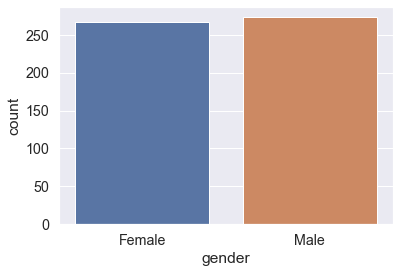

In [69]:
ax = sns.countplot(x='gender', data=real_data)
ax.set_xticklabels(['Female', 'Male'])

Max:,  55.0
Min: 18.0
Standard Deviation: 3.767398312269363


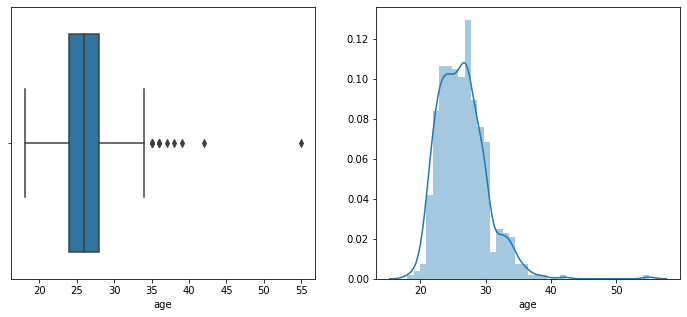

In [38]:
# Checking the age of the participants 
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.boxplot(x='age', data=real_data)
plt.subplot(122)
sns.distplot(real_data.age, hist=True)
print("Max:, ", real_data.age.max())
print("Min:", real_data.age.min())
print("Standard Deviation:", real_data.age.std())

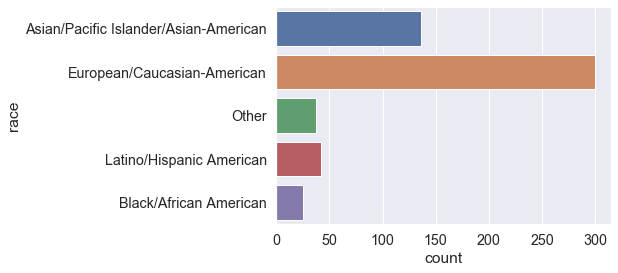

In [70]:
# Checking the race of the participants 
race = real_data['race']
race.replace([1.0, 2.0, 3.0, 4.0, 5.0, 6.0],['Black/African American', 'European/Caucasian-American',
                                             'Latino/Hispanic American', 'Asian/Pacific Islander/Asian-American', 
                                             'Native American', 'Other'], inplace=True)
sns.countplot(y='race', data=real_data, orient='h')

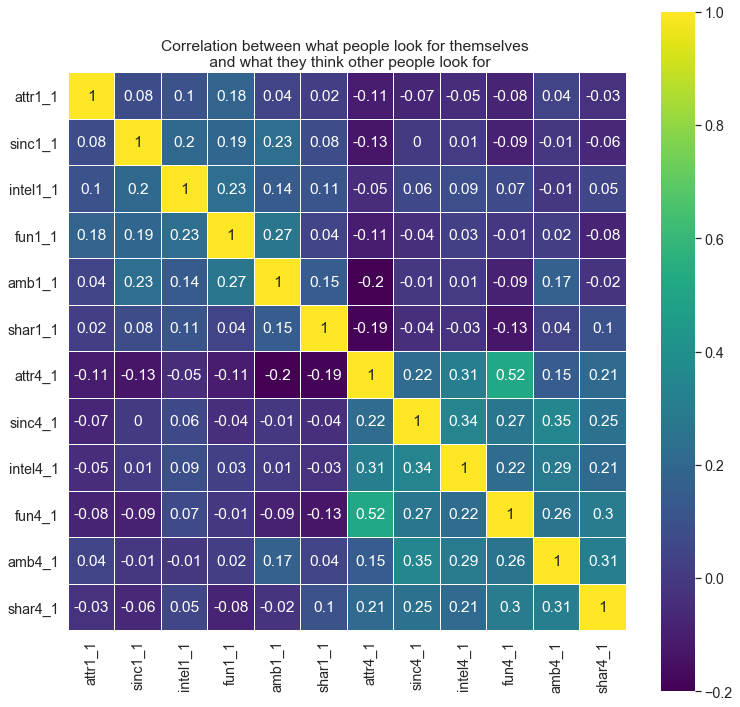

In [41]:
# let's check the linear correlations between the values to see which are most positively/negatively correlated
corrMatrix = real_data[['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1',
'attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1']].corr()
corrMatrix = round(corrMatrix, 2)
        
sns.set(font_scale=1.30)
plt.figure(figsize=(12.5, 12.5))

sns.heatmap(corrMatrix, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between what people look for themselves \n and what they think other people look for');

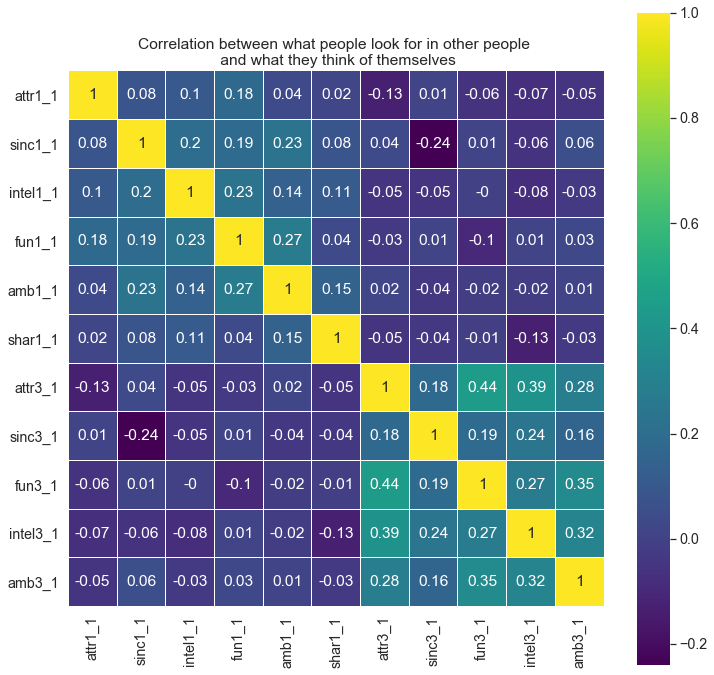

In [184]:
corrMatrix2 = real_data[['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1'
                        ,'attr3_1','sinc3_1','fun3_1','intel3_1','amb3_1']].corr()
corrMatrix2 = round(corrMatrix2, 2)

sns.set(font_scale=1.30)
plt.figure(figsize=(12, 12))

sns.heatmap(corrMatrix2, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between what people look for in other people \n and what they think of themselves');

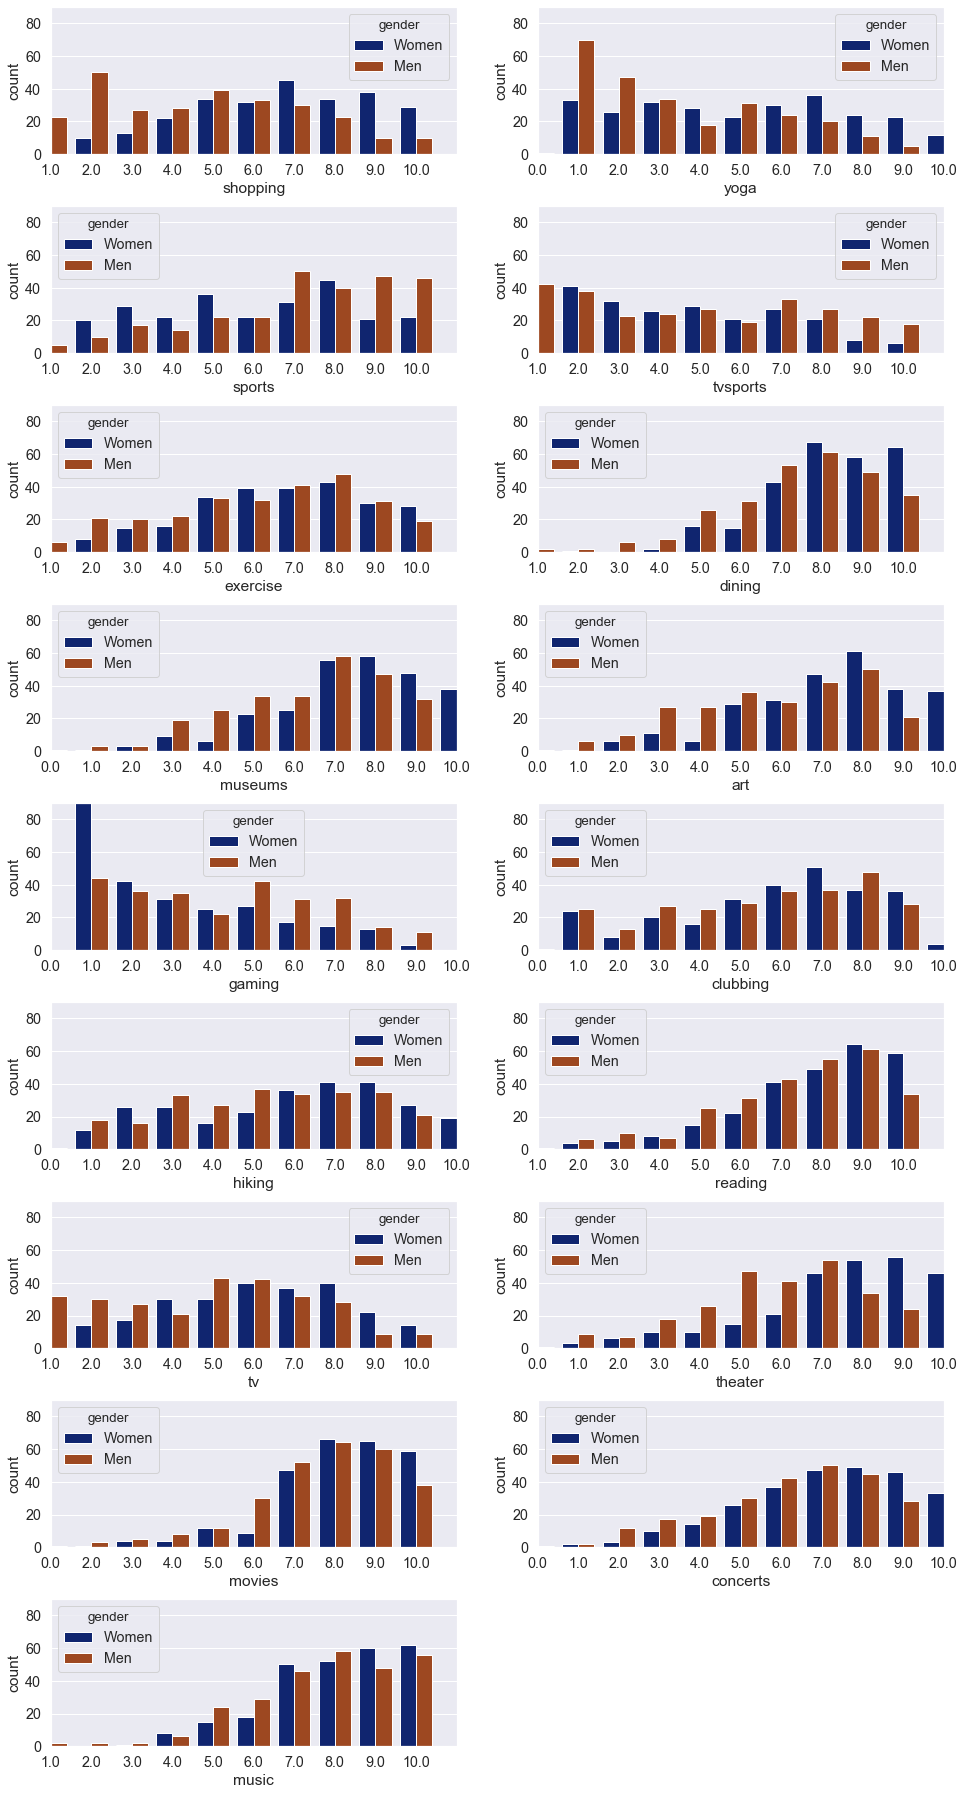

In [83]:
# Let's explore people's interests, comparing on the basis on gender
real_data2 = real_data.copy()
real_data2.gender.replace({0: 'Women', 1: 'Men'}, inplace=True)
real_data2.reading.replace({13: 10}, inplace=True)

ax = plt.figure(figsize=(16, 32))
plt.subplot(921)
sns.countplot(x='shopping', hue='gender', data=real_data2, palette='dark')
plt.xlim(0, 10)
plt.ylim(0, 90)
plt.subplot(922)
sns.countplot(x='yoga', hue='gender', data=real_data2, palette='dark')
plt.xlim(0, 10)
plt.ylim(0, 90)
plt.subplot(923)
sns.countplot(x='sports', hue='gender', data=real_data2, palette='dark')
plt.xlim(0, 10)
plt.ylim(0, 90)
plt.subplot(924)
sns.countplot(x='tvsports', hue='gender', data=real_data2, palette='dark')
plt.xlim(0, 10)
plt.ylim(0, 90)
plt.subplot(925)
sns.countplot(x='exercise', hue='gender', data=real_data2, palette='dark')
plt.xlim(0, 10)
plt.ylim(0, 90)
plt.subplot(926)
sns.countplot(x='dining', hue='gender', data=real_data2, palette='dark')
plt.xlim(0, 10)
plt.ylim(0, 90)
plt.subplot(927)
sns.countplot(x='museums', hue='gender', data=real_data2, palette='dark')
plt.xlim(0, 10)
plt.ylim(0, 90)
plt.subplot(928)
sns.countplot(x='art', hue='gender', data=real_data2, palette='dark')
plt.xlim(0, 10)
plt.ylim(0, 90)
plt.subplot(929)
sns.countplot(x='gaming', hue='gender', data=real_data2, palette='dark')
plt.xlim(0, 10)
plt.ylim(0, 90)
plt.subplot(9,2,10)
sns.countplot(x='clubbing', hue='gender', data=real_data2, palette='dark')
plt.xlim(0, 10)
plt.ylim(0, 90)
plt.subplot(9,2,11)
sns.countplot(x='hiking', hue='gender', data=real_data2, palette='dark')
plt.xlim(0, 10)
plt.ylim(0, 90)
plt.subplot(9,2,12)
sns.countplot(x='reading', hue='gender', data=real_data2, palette='dark')
plt.xlim(0, 10)
plt.ylim(0, 90)
plt.subplot(9,2,13)
sns.countplot(x='tv', hue='gender', data=real_data2, palette='dark')
plt.xlim(0, 10)
plt.ylim(0, 90)
plt.subplot(9,2,14)
sns.countplot(x='theater', hue='gender', data=real_data2, palette='dark')
plt.xlim(0, 10)
plt.ylim(0, 90)
plt.subplot(9,2,15)
sns.countplot(x='movies', hue='gender', data=real_data2, palette='dark')
plt.xlim(0, 10)
plt.ylim(0, 90)
plt.subplot(9,2,16)
sns.countplot(x='concerts', hue='gender', data=real_data2, palette='dark')
plt.xlim(0, 10)
plt.ylim(0, 90)
plt.subplot(9,2,17)
sns.countplot(x='music', hue='gender', data=real_data2, palette='dark')
plt.xlim(0, 10)
plt.ylim(0, 90)
ax.subplots_adjust(hspace=0.35)

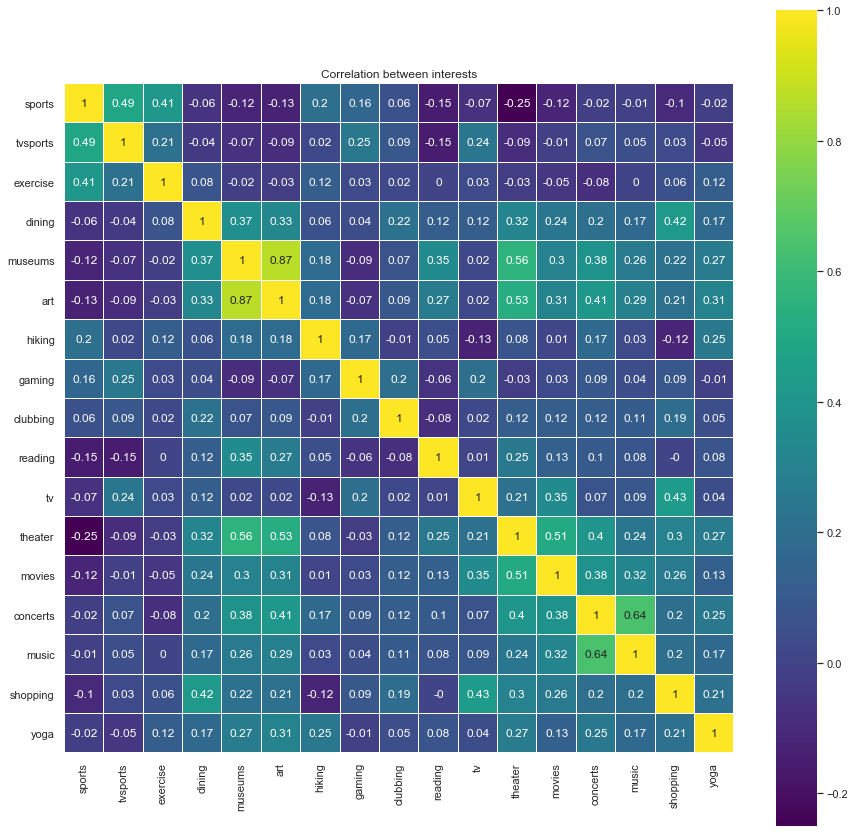

In [87]:
# Let's check to see which of the named interests share correlations 
corrMatrix3 = real_data[['sports','tvsports','exercise','dining','museums',
                       'art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts','music',
                       'shopping','yoga']].corr()
corrMatrix3 = round(corrMatrix3, 2)
        
sns.set(font_scale=1.0)
plt.figure(figsize=(15, 15))

sns.heatmap(corrMatrix3, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between interests');

In [137]:
# Check the number of positive matches per wave (note: the waves were not evenly sized)
matches = real_data[['wave', 'match']].groupby(['wave']).sum()
dates_per_round = [20, 35, 19, 36, 20, 10, 32, 20, 40, 18, 42, 29, 19, 38, 37, 14, 24, 12, 31, 14, 44]
match = pd.DataFrame([dates_per_round, matches.match])
match = match.T
match.columns = ['Dates', 'Matches']
match

,Dates,Matches
0,20,4
1,35,0
2,19,3
3,36,8
4,20,8
5,10,2
6,32,7
7,20,6
8,40,3
9,18,3


In [138]:
# Fixing values for expectations and satisfaction ratings
real_data4 = real_data.copy()
real_data4.exphappy.to_string()
real_data4.satis_2 = [5.0 if (value > 5) and (value < 6) else value for value in real_data4.satis_2]
real_data4.satis_2.value_counts()

5.0     148
6.0     118
7.0      91
8.0      51
4.0      48
3.0      34
2.0      26
9.0      15
1.0       5
10.0      4
Name: satis_2, dtype: int64

Average expectation rating (1 - 10): 5.506
Average satisfaction rating (1 - 10): 5.591


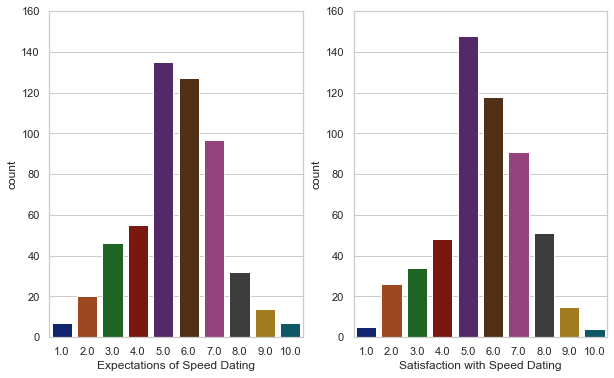

In [144]:
# Compare how participants' expectations measured up to their reactions 
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.countplot(x = 'exphappy', data=real_data4, palette='dark')
plt.xlabel('Expectations of Speed Dating')
plt.ylim(0, 160)
plt.subplot(122)
sns.countplot(x = 'satis_2', data=real_data4, palette='dark')
plt.xlabel('Satisfaction with Speed Dating')
plt.ylim(0, 160)
print('Average expectation rating (1 - 10):', round(real_data4.exphappy.mean(), 3))
print('Average satisfaction rating (1 - 10):', round(real_data4.satis_2.mean(), 3))

In [151]:
# Take a look at people's experience of speed dating on the basis of whether they got a match or not
yes_match = real_data.loc[real_data.match == 1]
no_match = real_data.loc[real_data.match == 0]
good_experience_ym = yes_match.loc[yes_match.exphappy < yes_match.satis_2]
bad_experience_ym = yes_match.loc[yes_match.exphappy > yes_match.satis_2]
no_change_ym = yes_match.loc[yes_match.exphappy == yes_match.satis_2]
good_experience_nm = no_match.loc[no_match.exphappy < no_match.satis_2]
bad_experience_nm = no_match.loc[no_match.exphappy > no_match.satis_2]
no_change_nm = no_match.loc[no_match.exphappy == no_match.satis_2]
yes_match_values = np.array([len(good_experience_ym), len(bad_experience_ym), len(no_change_ym), len(yes_match)])
no_match_values = np.array([len(good_experience_nm), len(bad_experience_nm), len(no_change_nm), len(no_match)])
total_part = np.array([len(yes_match), len(no_match)])
opinion = pd.DataFrame(index=[yes_match_values, no_match_values])
opinion.reset_index(inplace=True)
opinion.rename(columns={'level_0': 'Matches', 'level_1': 'No Matches'}, 
               index={0: 'Good Experience', 1: 'Bad Experience', 2: 'No Change', 3: 'Total'}, inplace=True)
opinion

,Matches,No Matches
Good Experience,37,194
Bad Experience,26,179
No Change,18,86
Total,81,459


In [152]:
# Good experience reflects the fact that the expectation values are lower than the satisfaction values, etc. 
fig = go.Figure(data=[
    go.Bar(name='Matches', x=opinion.index, y=opinion['Matches']), 
    go.Bar(name='No Matches', x=opinion.index, y=opinion['No Matches'])
])
fig.update_layout(barmode='group')
fig.show()

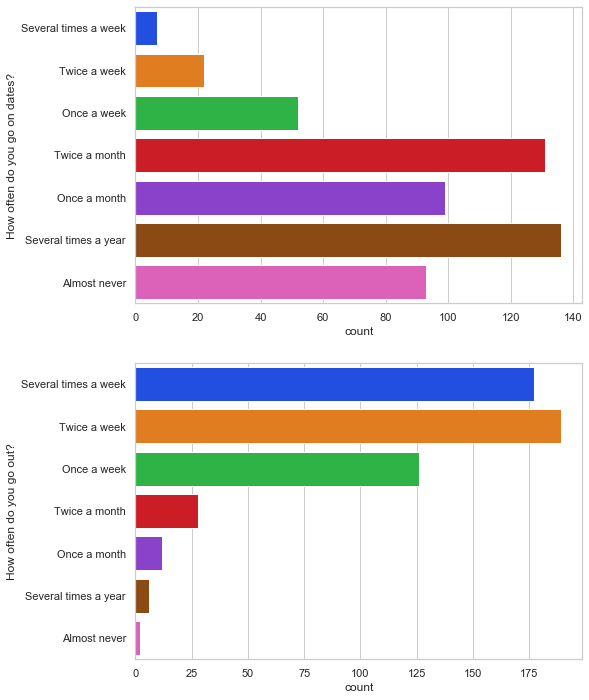

In [166]:
# Let's take a look at how interested the participants are in dating generally
real_data7 = real_data.copy()
time_values = ['Several times a week', 'Twice a week', 'Once a week', 'Twice a month', 'Once a month', 
               'Several times a year', 'Almost never']
plt.figure(figsize=(8,12))
ax1 = plt.subplot(211)
sns.countplot(y='date', data=real_data7, palette='bright', orient='h')
plt.ylabel('How often do you go on dates?')
ax2 = plt.subplot(212)
sns.countplot(y='go_out', data=real_data7, palette='bright', orient='h')
plt.ylabel('How often do you go out?')
ax1.set_yticklabels(time_values)
ax2.set_yticklabels(time_values)
plt.show()

[Text(0, 0, 'Seemed like a fun night out'),
 Text(0, 0, 'To meet new people'),
 Text(0, 0, 'To get a date'),
 Text(0, 0, 'Looking for a serious relationship'),
 Text(0, 0, 'To say I did it'),
 Text(0, 0, 'Other')]

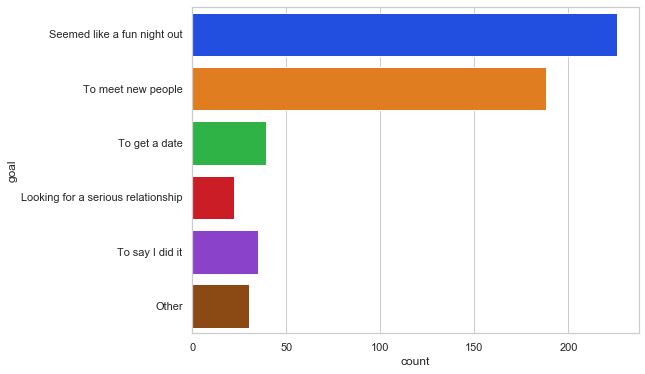

In [171]:
# With the participants' dating profiles in mind, let's look at what their motives for doing the experiment were
motives = ['Seemed like a fun night out', 'To meet new people','To get a date',
           'Looking for a serious relationship', 'To say I did it', 'Other']

plt.figure(figsize=(8,6))
ax = sns.countplot(y='goal', data=real_data7, palette='bright', orient='h')
ax.set_yticklabels(motives)

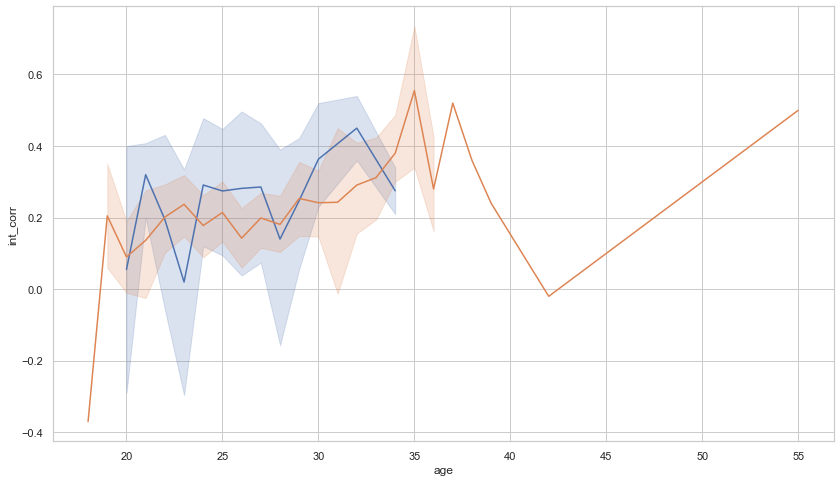

In [173]:
# Using the interests correlation value, 
# let's look at the relation between getting a match and having correlated interests
common_interests = yes_match.int_corr
common_interests_no = no_match.int_corr

plt.figure(figsize=(14,8))
sns.lineplot(x='age', y='int_corr', data=yes_match)
sns.lineplot(x='age', y='int_corr', data=no_match)

Text(0.5, 0, 'Number of Expected Dates')

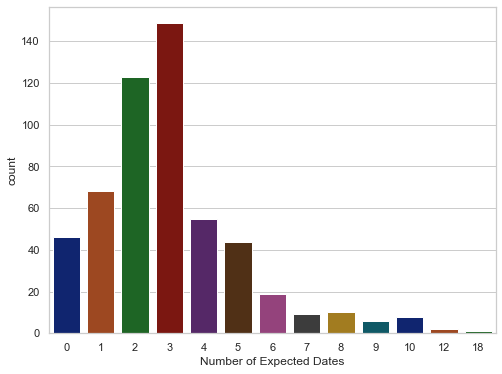

In [182]:
real_data4.match_es = [round(value) for value in real_data4.match_es]
plt.figure(figsize=(8, 6))
sns.countplot(x='match_es', data=real_data4, palette='dark')
plt.xlabel('Number of Expected Dates')

## Conclusions

After conducting exploratory data analysis on our cleaned dataset, we can draw the following conclusions: 
* There were more female participants than male participants in this experiment although the numbers are pretty even. 
* The average age is between 20 and 30 although there are a couple of people over 40 and one 55 year old. 
* Most of the daters were Caucasian although not exclusively. 
* People who the other people look for attractive partners also think that other people look for fun partners and aren’t bothered about shared interests or ambition. 
* People who think they themselves are fun also think they are fun. 
* People who think of themselves as intelligent also think of themselves as ambitious, attractive and quite fun. 
* Sincerity is the least valued quality in a prospective partner. 
* People are generally pretty interested in dining, movies and music. 
* Women say they are more interested in concerts, movies, theatre, reading, museums, art and yoga. 
* Men say they are more interested in sports and tv sports. 
* No one seems that interested in gaming. 
* The strongest correlation between interests is concerts and movies. 
* People who like museums also like theatre and art. 
* People who like shopping also seem to like TV and dining. 
* People who like sports tend to not like the theatre. 
* The more people in the speed dating wave does not seem to lead to more matches since some of the higher waves have very low numbers of matches. 
* The experience exceeded more people’s expectations than people whose expectations it didn’t meet.
* However, most people report average satisfaction levels with the experience. 
* People tend to go out at least once or twice a week. However, people tend not to date that often. 
* Most people took part in the experiment because it seemed like a fun night out and only a very small number of people said that they took part to find a serious relationship. 
* Shared interests do not seem to have a massive impact on whether the couple was a match or not. 
* Most people expected around two or three dates and some weirdos thought they would get 18 dates. 


There is a lot more we could do with this dataset and a lot of possible relationships I have left unexplored. However, this is just an example of the kind of questions we could answer by looking at this dataset and using exploratory data analysis. 